In [26]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Specify the file path of the metrics.csv file
csv_file = 'all_metrics.csv'

# Load the CSV file into a pandas DataFrame
metrics_df = pd.read_csv(csv_file)


# Set the style of the plot
sns.set(style="whitegrid")

# Specify the directory path to save the PNG files
save_dir = os.getcwd()  # Use the current working directory

blue_palette = sns.light_palette("blue", n_colors=10)
red_palette = sns.light_palette("red", n_colors=10)
green_palette = sns.light_palette("green", n_colors=10)
purple_palette = sns.light_palette("purple", n_colors=10)
# Define a medium custom color palette
medium_palette = {
    'UNSW_NB15': blue_palette[8],
    'NSL_KDD': red_palette[8],
    'CICIDS': green_palette[7],
    'EdgeIIoT': purple_palette[7]
}

def plot_metric(metric):
    plt.figure(figsize=(15, 10))
    sns.barplot(x='Model', y=metric, hue='Dataset', data=metrics_df, palette=medium_palette)
    plt.title(f'{metric} for each Model on each Dataset', fontsize=16)
    plt.xlabel('Model', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(os.path.join(save_dir, f'{metric}.png'), dpi=300, bbox_inches='tight')
    plt.close()  # Close the plot without displaying it on the screen

    #plt.savefig(os.path.join(save_dir, f'{metric}.png'), dpi=300)


# Plotting the metrics
for metric in ['Accuracy', 'Precision (macro)', 'Recall (macro)', 'F1-score (macro)', 'AUC-ROC (macro)']:
    plot_metric(metric)


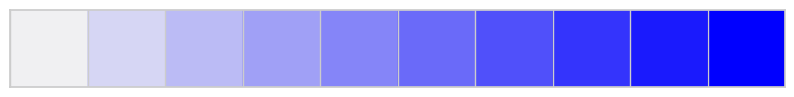

In [8]:
blue_palette = sns.light_palette("blue", n_colors=10)
sns.palplot(blue_palette)
#blue_palette[9]

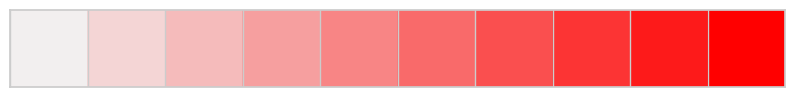

In [9]:
red_palette = sns.light_palette("red", n_colors=10)
sns.palplot(red_palette)
#red_palette[9]

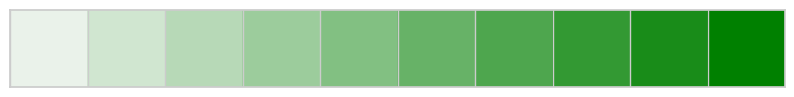

In [10]:
green_palette = sns.light_palette("green", n_colors=10)
sns.palplot(green_palette)
#green_palette[9]

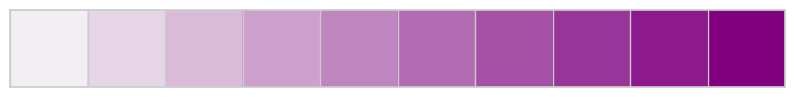

In [11]:
purple_palette = sns.light_palette("purple", n_colors=10)
sns.palplot(purple_palette)
#purple_palette[9]

In [ ]:
blue_palette = sns.light_palette("blue", n_colors=10)
red_palette = sns.light_palette("red", n_colors=10)
green_palette = sns.light_palette("green", n_colors=10)
purple_palette = sns.light_palette("purple", n_colors=10)

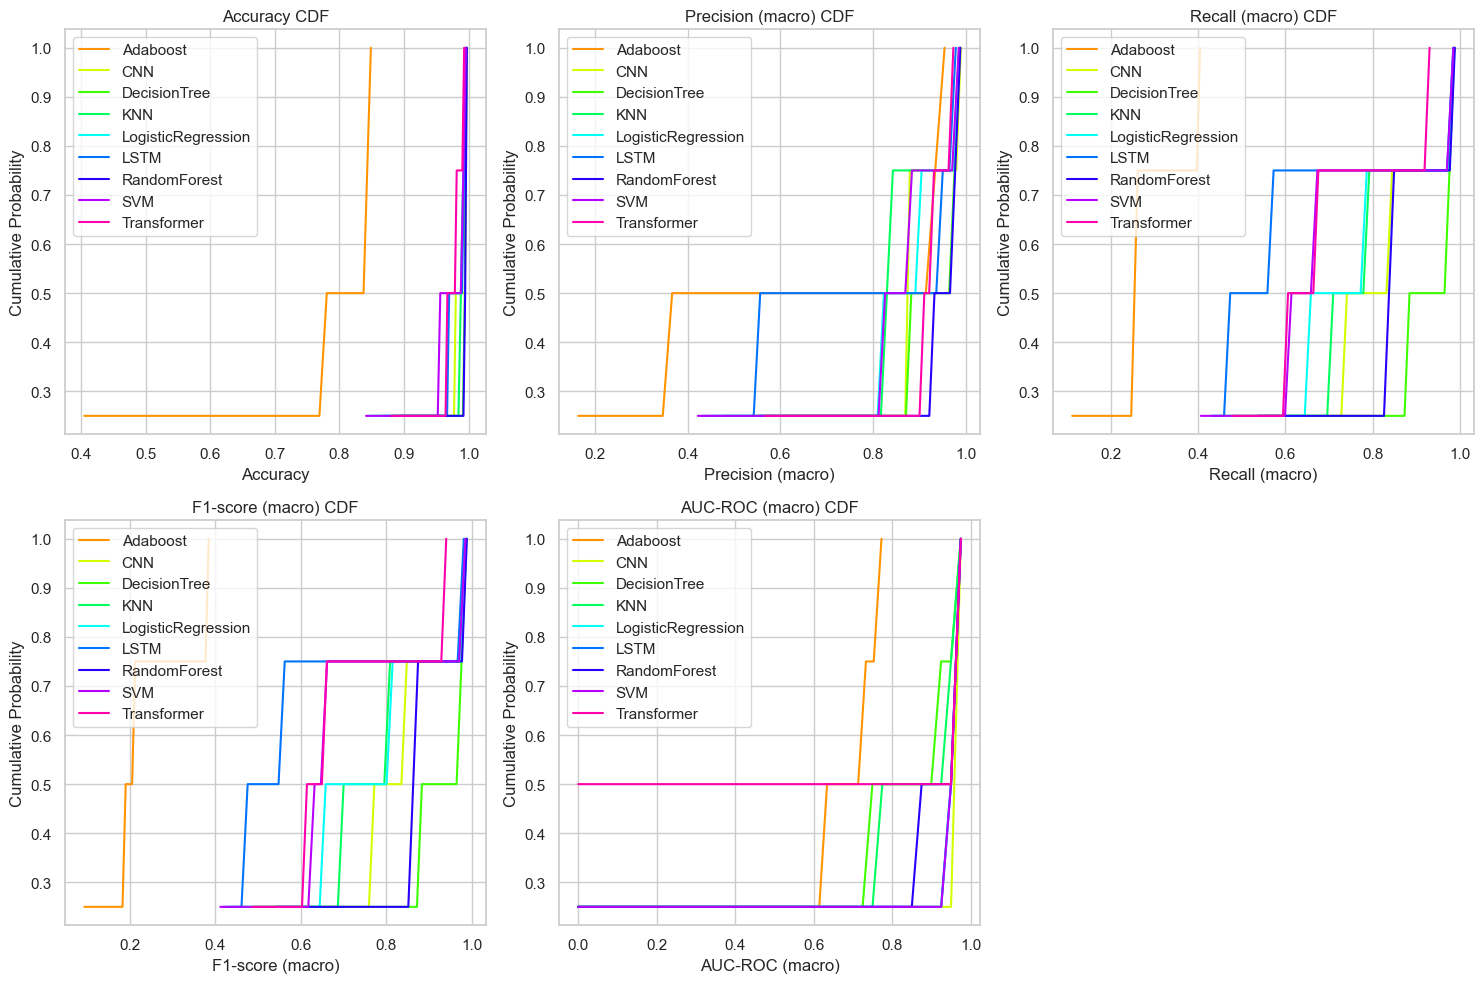

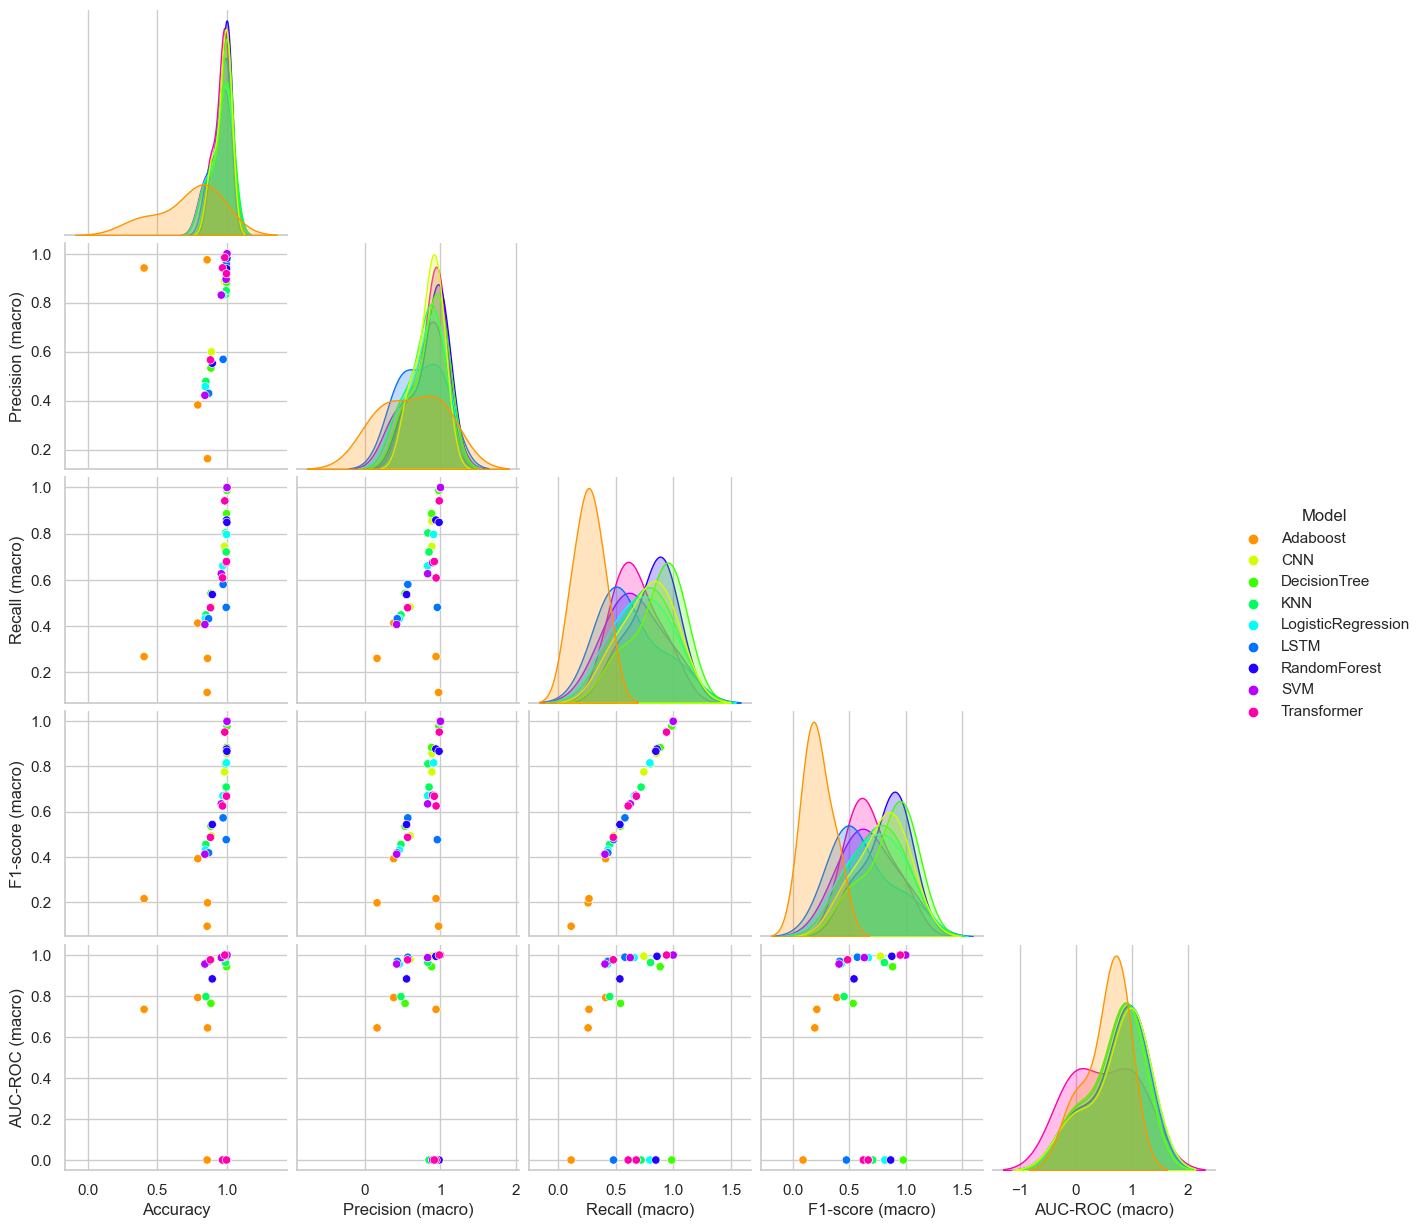

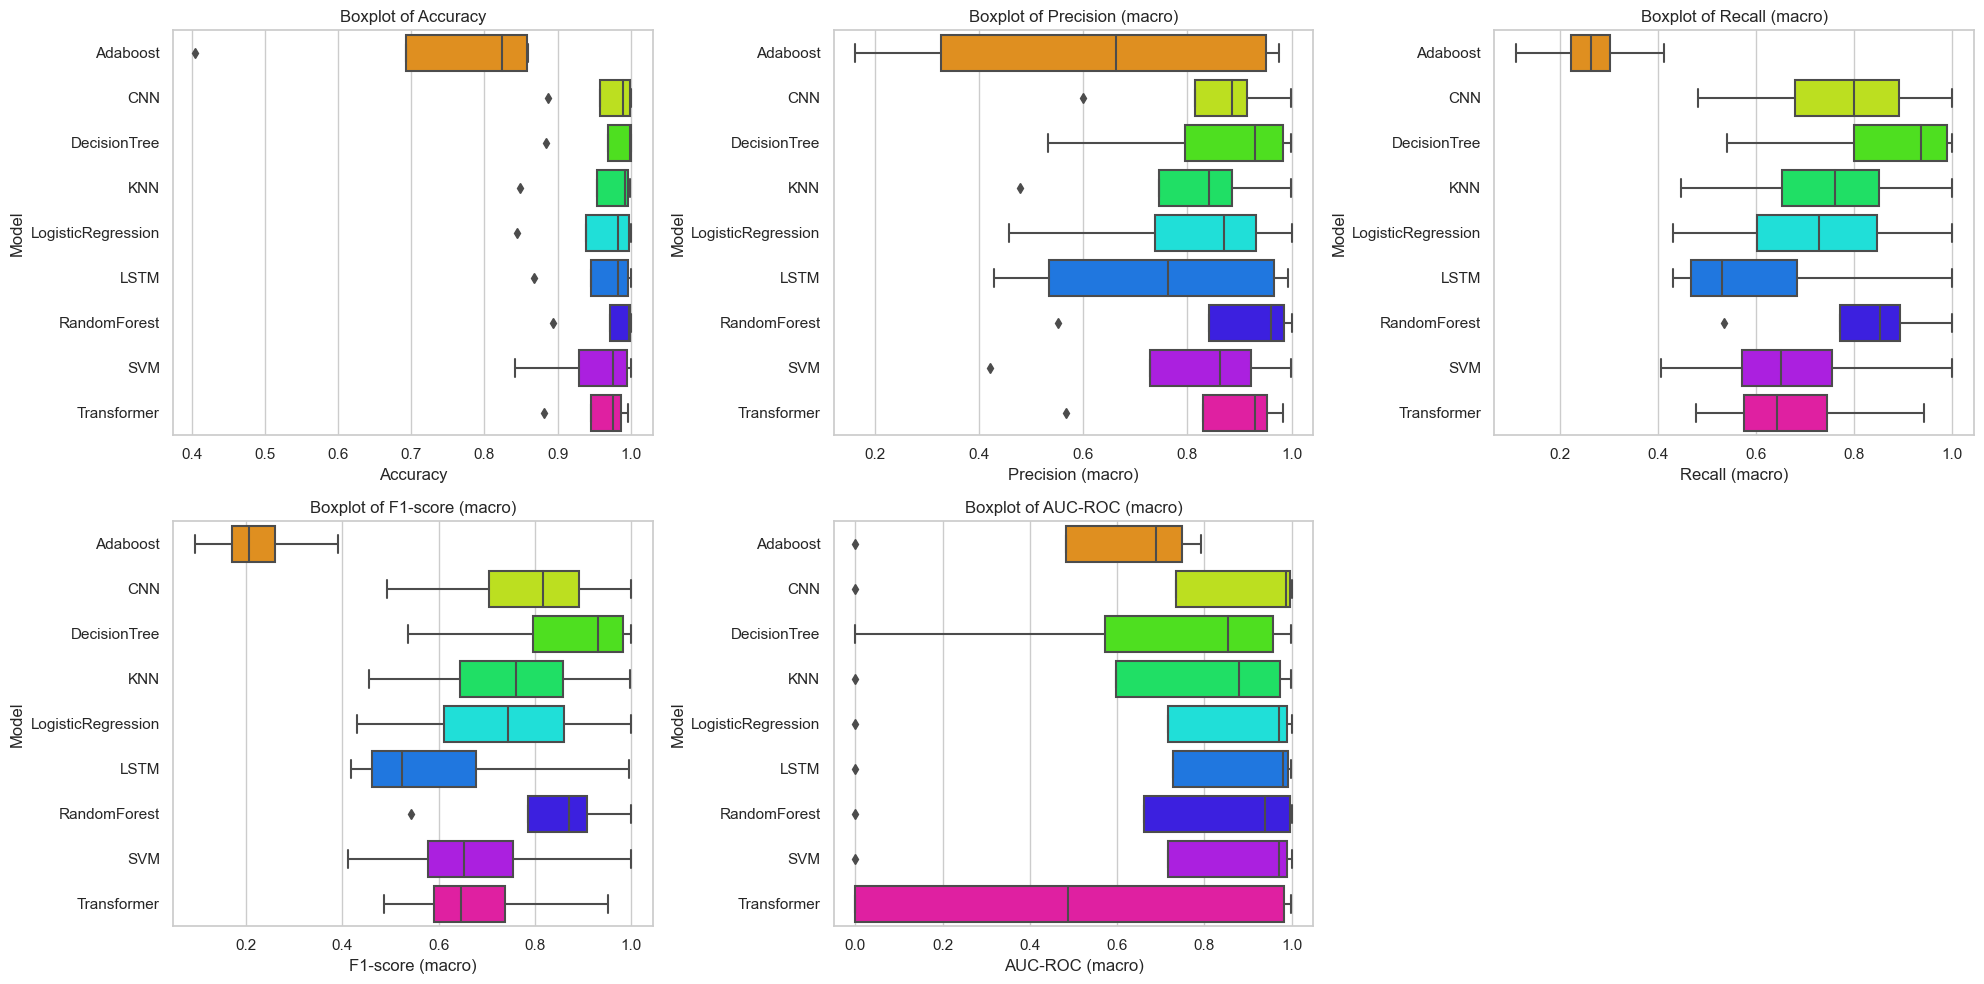

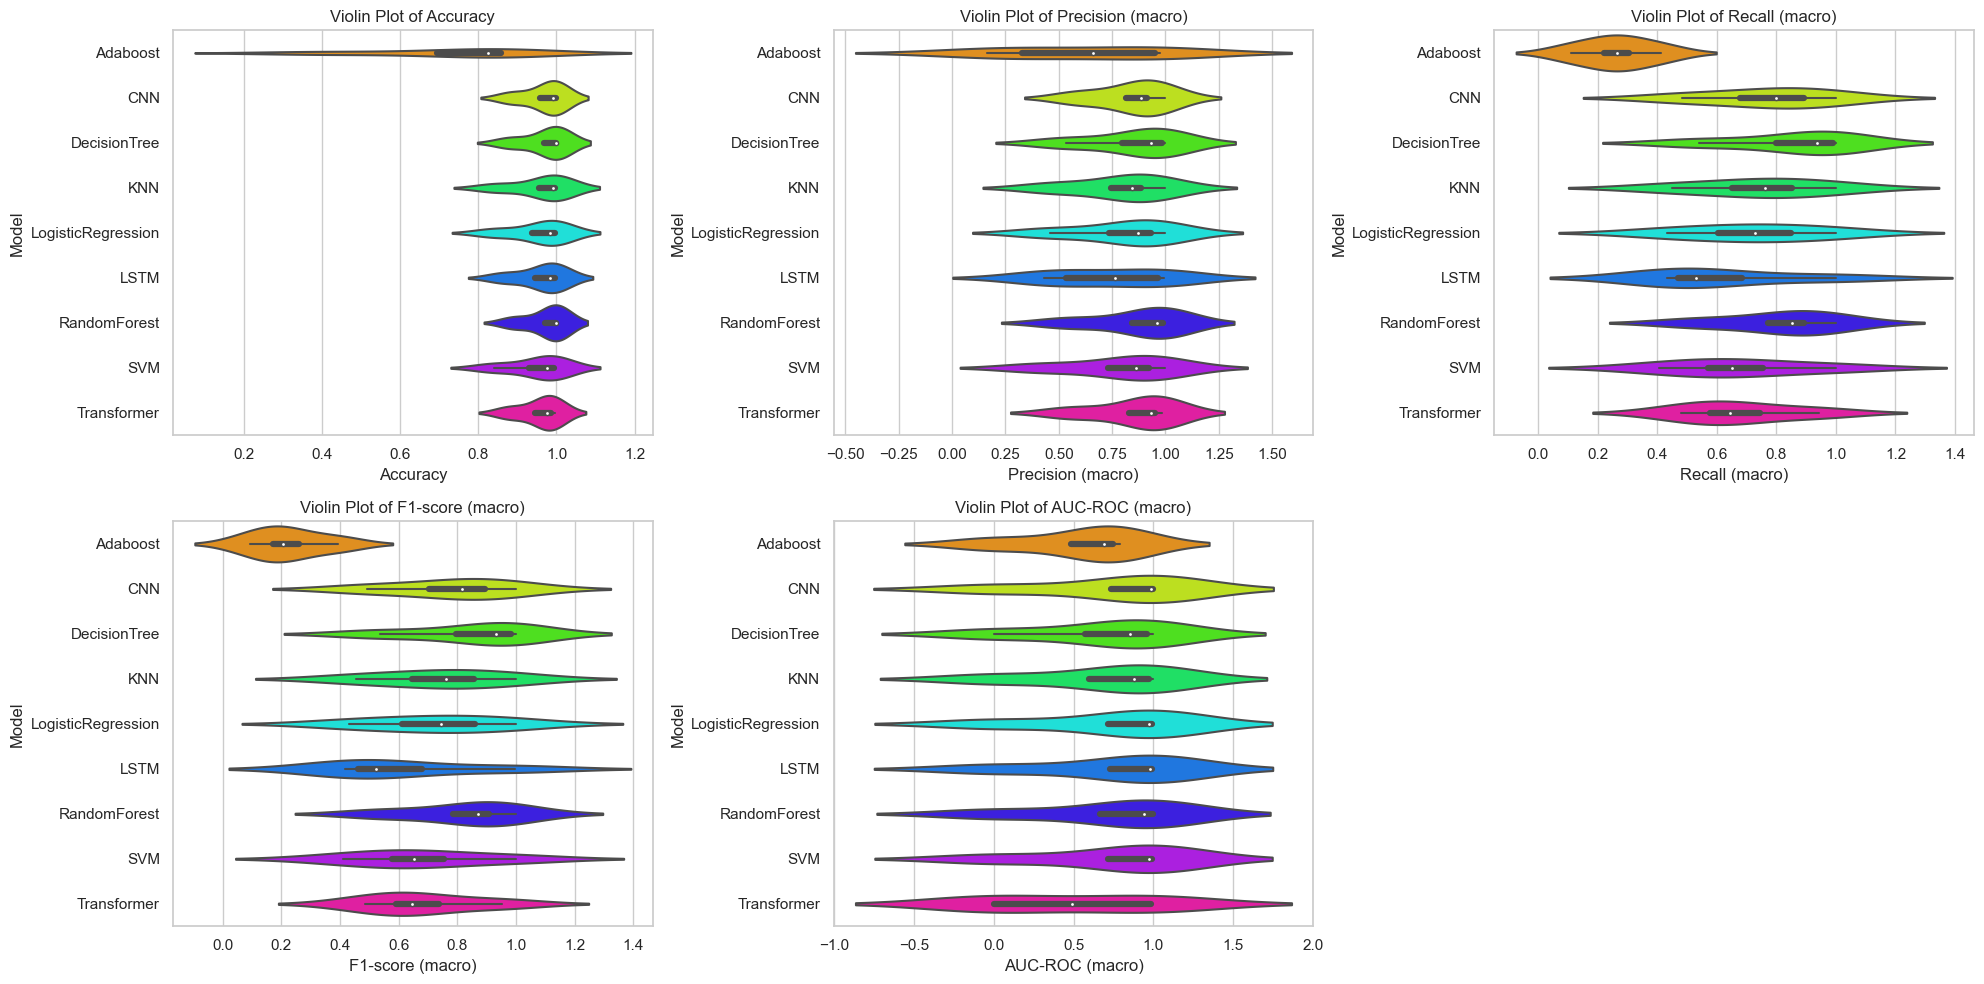

In [7]:
# Importing required libraries
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
save_dir = os.getcwd()
# Specify the file path of the metrics.csv file
csv_file = 'all_metrics.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)
df.fillna(0, inplace=True)
# Set the style of the plot
sns.set(style="whitegrid")

# Defining a color palette with distinct colors for each model
palette = sns.color_palette('hsv', df['Model'].nunique())

# List of metrics
metrics = ['Accuracy', 'Precision (macro)', 'Recall (macro)', 'F1-score (macro)', 'AUC-ROC (macro)']

# CDF plots
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    for model in df['Model'].unique():
        values, base = np.histogram(df[df['Model'] == model][metric], bins=40, density=True)
        cumulative = np.cumsum(values) / sum(values)
        plt.plot(base[:-1], cumulative, label=model, color=palette[df['Model'].unique().tolist().index(model)])
    plt.title(f'{metric} CDF')
    plt.xlabel(metric)
    plt.ylabel('Cumulative Probability')
    plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'CDF_plot.png'), dpi=300, bbox_inches='tight')

# Pairplot
sns.pairplot(df, hue='Model', palette=palette, vars=metrics, corner=True)
plt.savefig(os.path.join(save_dir, 'pairplot.png'), dpi=300, bbox_inches='tight')

# Boxplots
plt.figure(figsize=(20, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y='Model', x=metric, palette=palette)
    plt.title(f'Boxplot of {metric}')
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'boxplot.png'), dpi=300, bbox_inches='tight')

# Violin plots
plt.figure(figsize=(20, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(data=df, y='Model', x=metric, palette=palette)
    plt.title(f'Violin Plot of {metric}')
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'violinplot.png'), dpi=300, bbox_inches='tight')


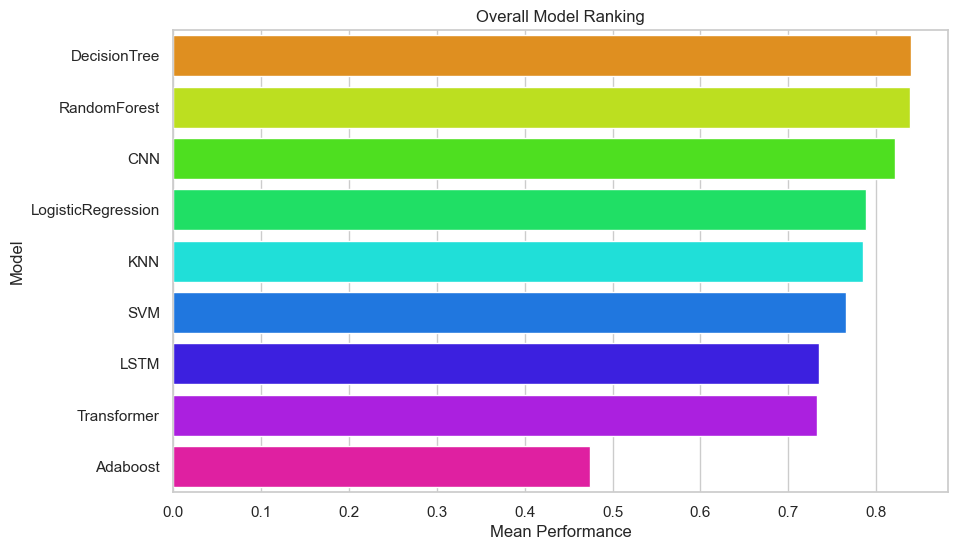

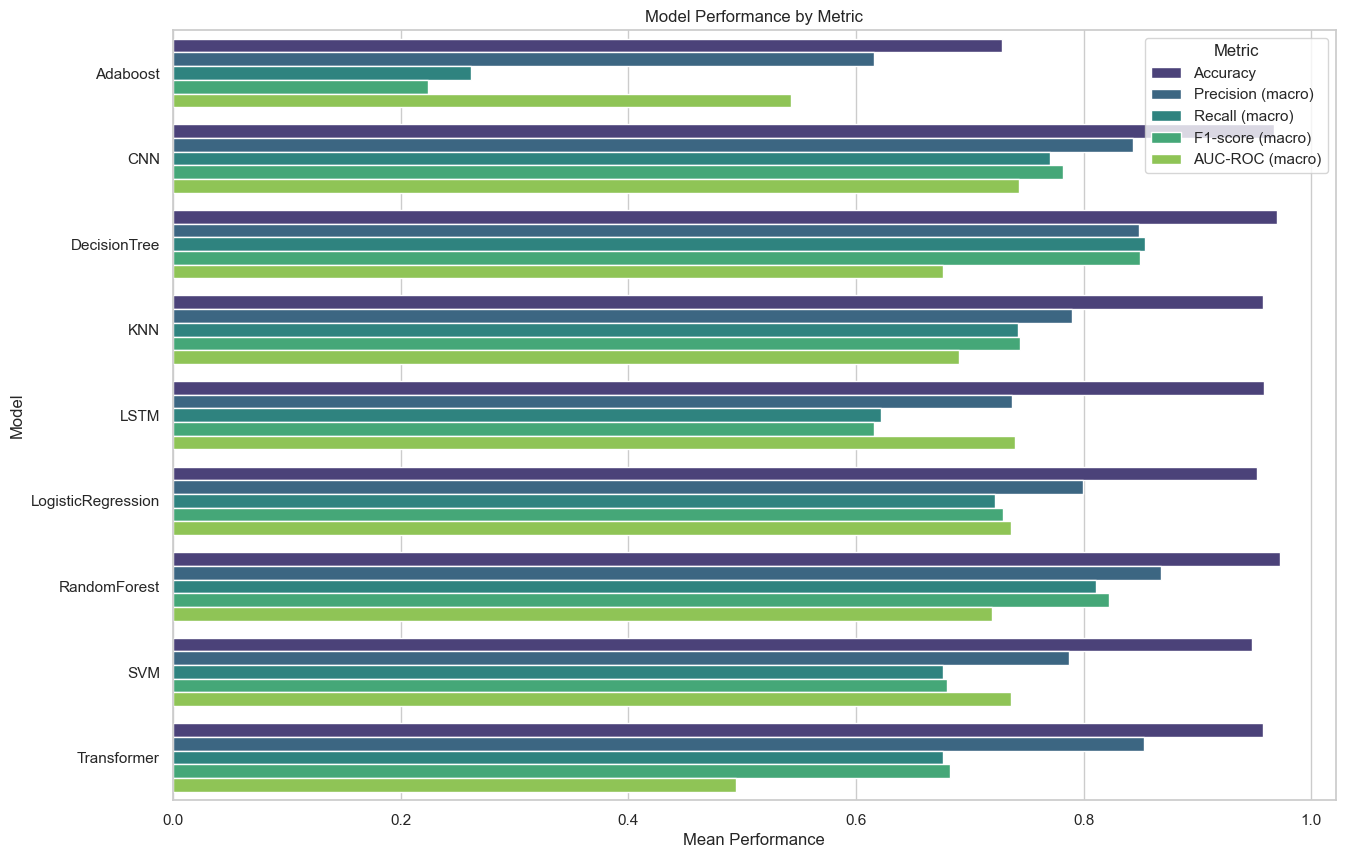

In [4]:
# Importing required libraries
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
save_dir = os.getcwd()
# Specify the file path of the metrics.csv file
csv_file = 'all_metrics.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)
df.fillna(0, inplace=True)
# Set the style of the plot
sns.set(style="whitegrid")

# Defining a color palette with distinct colors for each model
palette = sns.color_palette('hsv', df['Model'].nunique())
# Define metrics
metrics = ['Accuracy', 'Precision (macro)', 'Recall (macro)', 'F1-score (macro)', 'AUC-ROC (macro)']

# Compute the mean performance for each model across all metrics and datasets
mean_performance = df.groupby('Model')[metrics].mean().mean(axis=1)

# Sort the models by their mean performance
sorted_model_performance = mean_performance.sort_values(ascending=False)

# Create a color palette with distinct colors for each model
# palette = sns.color_palette('hsv', len(sorted_model_performance))

# Create a bar plot showing an overall ranking of the models
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_model_performance.values, y=sorted_model_performance.index, palette=palette)
plt.title('Overall Model Ranking')
plt.xlabel('Mean Performance')
plt.ylabel('Model')
plt.show()

# Compute the mean performance for each model for each metric
mean_performance_metrics = df.groupby('Model')[metrics].mean()

# Reset index to flatten the DataFrame for plotting
mean_performance_metrics = mean_performance_metrics.reset_index().melt(id_vars='Model', var_name='Metric', value_name='Mean Performance')

# Create a bar plot showing various metrics for each model
plt.figure(figsize=(15, 10))
sns.barplot(data=mean_performance_metrics, x='Mean Performance', y='Model', hue='Metric', palette='viridis')
plt.title('Model Performance by Metric')
plt.xlabel('Mean Performance')
plt.ylabel('Model')
plt.legend(title='Metric')
plt.savefig(os.path.join(save_dir, 'all_mets_mean.png'), dpi=300, bbox_inches='tight')